Develop a neural network using backpropagation to classify images from the CIFAR-10
dataset. The dataset contains 60,000 32x32 color images divided into 10 classes
(airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks).
Your objective is to build a neural network model, train it using backpropagation, and
evaluate its performance.
You can download the dataset
https://www.kaggle.com/c/cifar-10/
https://www.cs.toronto.edu/~kriz/cifar.html

Instructions:
1. Data Preprocessing:
- Load the CIFAR-10 dataset.
- Perform necessary data preprocessing steps:
 - Normalize pixel values to range between 0 and 1.
 - Convert class labels into one-hot encoded format.
 - Split the dataset into training and test sets (e.g., 50,000 images for
training and 10,000 for testing).
 - Optionally, apply data augmentation techniques (such as random
flips, rotations, or shifts) to improve the generalization of the
model.

2. Network Architecture Design:
- Design a feedforward neural network to classify the images.
 - Input Layer: The input shape should match the 32x32x3
dimensions of the CIFAR-10 images.
 - Hidden Layers: Use appropriate layers.
 - Output Layer: The final layer should have 10 output neurons (one
for each class) with a softmax activation function for multi-class
classification.

Question:

- Justify your choice of network architecture, including the number of
layers, types of layers, and the number of neurons/filters in each layer.

3. Activation Functions:
- Choose any two appropriate activation functions for the hidden layers
(e.g., ReLU, sigmoid, or tanh).
- Explain why you selected a particular activation function and its role in
the backpropagation process.
4. Loss Function and Optimizer:
- Use any two loss functions and compare with the categorical cross
entropy since this is a multi-class classification problem.
- Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain
how the learning rate affects the backpropagation process.

Question:

- How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?

5. Training the Model:
- Implement backpropagation to update the weights and biases of the
network during training.
- Train the model for a fixed number of epochs (e.g., 50 epochs) and
monitor the training and validation accuracy.

Question:

- How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?

6. Model Evaluation:
- After training, evaluate the performance of your model on the test set.
- Calculate accuracy, precision, recall, F1-score, and the confusion matrix
to understand the model’s classification performance.

Question:

- How can you further improve model performance if the accuracy is low?
7. Optimization Strategies:
- Discuss optimization strategies such as:

 - Early stopping to prevent overfitting.
 - Learning rate scheduling for smoother convergence.
 - Weight initialization techniques to ensure efficient learning.

Question:

- Why is weight initialization important, and how does it impact the
convergence of your network?

8. Report:
- Provide a detailed report/documentation that includes (in Colab file):
 - The architecture of the network and justifications for the choices
made.
 - Training and test accuracy with relevant plots showing loss and
accuracy over the epochs.
 - Hyperparameter values used (learning rate, batch size, number of
epochs, etc.).
 - A brief discussion of the challenges you faced and how you
addressed them.

# Imports

In [33]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Preprocessing:
- Load the CIFAR-10 dataset.
- Perform necessary data preprocessing steps:
 - Normalize pixel values to range between 0 and 1.
 - Convert class labels into one-hot encoded format.
 - Split the dataset into training and test sets (e.g., 50,000 images for
training and 10,000 for testing).
 - Optionally, apply data augmentation techniques (such as random
flips, rotations, or shifts) to improve the generalization of the
model.

In [34]:
# Initialize hyperparameters
batch_size = 32
num_classes = 10
epochs = 50

In [35]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class labels into one-hot encoded format.
y_train, y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)


In [36]:
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 10)


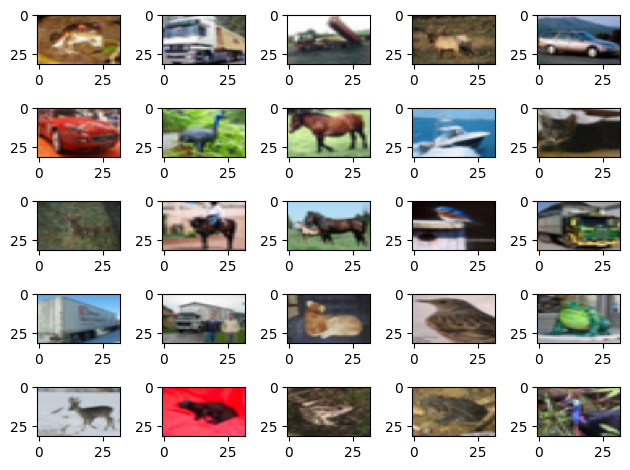

In [37]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
plt.tight_layout()
plt.show()

# 2. Network Architecture Design:
- Design a feedforward neural network to classify the images.
 - Input Layer: The input shape should match the 32x32x3
dimensions of the CIFAR-10 images.
 - Hidden Layers: Use appropriate layers.
 - Output Layer: The final layer should have 10 output neurons (one
for each class) with a softmax activation function for multi-class
classification.



In [38]:
model = Sequential()

# Input Layer
print(f"Input shape: {x_train.shape[1:]}")
model.add(Flatten(input_shape=x_train.shape[1:]))

Input shape: (32, 32, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Question:

- Justify your choice of network architecture, including the number of
layers, types of layers, and the number of neurons/filters in each layer.

 - I used 1 input layer, that took the input just like that.
 - 2 hidden layers: one with 512 neurons another with 256 neurons. Used ReLU and Tanh activation functions.
 - dropped 20% after 1st hidden layer and 30% after 2nd hidden layer.
 - Output layer: this layer outputs 10 neurons and uses softmax activation.

# 3. Activation Functions:
- Choose any two appropriate activation functions for the hidden layers
(e.g., ReLU, sigmoid, or tanh).
- Explain why you selected a particular activation function and its role in
the backpropagation process.


In [39]:
# Hidden Layer 1: Fully connected layer with 512 neurons, using ReLU activation
model.add(Dense(512, activation='relu'))

# Dropping 20% of the neurons
model.add(Dropout(0.2))

# Hidden Layer 2: Fully connected layer with 256 neurons, using Tanh activation
model.add(Dense(256, activation='tanh'))

# Dropping 30% of the neurons
model.add(Dropout(0.3))

# Output Layer: Fully Connected layer with 10 output neurons.
model.add(Dense(10, activation='softmax'))

In [40]:
# model description
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

I used ReLU, TanH and Softmax acivation functions in the hidden and output layers.
- ReLU introduces non-linearity while being computationally efficient.
- TanH typically has steeper gradients, making it more effective for training deep networks.
- Softmax is typically used in the output layer for multi-class classification. In our case we wanted to output the 10 classes as output.

# 4. Loss Function and Optimizer:
- Use any two loss functions and compare with the categorical cross
entropy since this is a multi-class classification problem.
- Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain
how the learning rate affects the backpropagation process.



In [41]:
categorical_loss = clone_model(model)
mse_loss = clone_model(model)
kld_loss = clone_model(model)

adam_optimizer = clone_model(model)
sdg_optimizer = clone_model(model)
rmsprop_optimizer = clone_model(model)

categorical_loss.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mse_loss.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
kld_loss.compile(optimizer='adam', loss='kl_divergence', metrics=['accuracy'])

adam_optimizer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
sdg_optimizer.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
rmsprop_optimizer.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Question:

- How does the choice of optimizer and learning rate influence the
convergence of the network?

 - Used Adam which adapts the learning rate for each parameter based on first and second moments of the gradients, usually leading to faster convergence.
 - SDG (SStochastic Gradient Descent) which is a optimizer that updates weights using the gradient of the loss function. It can converge slowly and is sensitive to the learning rate.
 - RMSprop adjusts the learning rate for each parameter based on the average of the squared gradients for that parameter.  
- How would you adjust the learning rate if the
model is not converging properly?
 - We can tune manually, monitoring it and early stopping based on trainng and validation loass or automatically by using adaptive techniques.
 - It can lead to improvements in training stability and performance.

#5. Training the Model:
- Implement backpropagation to update the weights and biases of the
network during training.
- Train the model for a fixed number of epochs (e.g., 50 epochs) and
monitor the training and validation accuracy.



In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [43]:
m1 = categorical_loss.fit(x_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1749 - loss: 2.3865 - val_accuracy: 0.3235 - val_loss: 1.8683
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2947 - loss: 1.9104 - val_accuracy: 0.3645 - val_loss: 1.7640
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3304 - loss: 1.8290 - val_accuracy: 0.3917 - val_loss: 1.6794
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3474 - loss: 1.7922 - val_accuracy: 0.3976 - val_loss: 1.6768
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3556 - loss: 1.7639 - val_accuracy: 0.4148 - val_loss: 1.6279
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3644 - loss: 1.7473 - val_accuracy: 0.4114 - val_loss: 1.6299
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3733 - loss: 1.7332 - val_accuracy: 0.4071 - val_loss: 1.6288
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3814 - loss: 1.7039 - 

In [44]:
m2 = mse_loss.fit(x_train, y_train,
                           epochs = epochs,
                           batch_size=batch_size,
                           validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1331 - loss: 0.0962 - val_accuracy: 0.2898 - val_loss: 0.0826
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2729 - loss: 0.0835 - val_accuracy: 0.3413 - val_loss: 0.0780
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3293 - loss: 0.0791 - val_accuracy: 0.3615 - val_loss: 0.0765
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3531 - loss: 0.0775 - val_accuracy: 0.3777 - val_loss: 0.0748
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3615 - loss: 0.0765 - val_accuracy: 0.3955 - val_loss: 0.0737
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3743 - loss: 0.0758 - val_accuracy: 0.4003 - val_loss: 0.0730
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3799 - loss: 0.0753 - val_accuracy: 0.4140 - val_loss: 0.0723
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3921 - loss: 0.0745 - 

In [45]:
m3 = kld_loss.fit(x_train, y_train,
                           epochs = epochs,
                           batch_size=batch_size,
                           validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1803 - loss: 2.3531 - val_accuracy: 0.3024 - val_loss: 1.8378
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3014 - loss: 1.8984 - val_accuracy: 0.3664 - val_loss: 1.7443
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3283 - loss: 1.8319 - val_accuracy: 0.3779 - val_loss: 1.7073
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3522 - loss: 1.7811 - val_accuracy: 0.3921 - val_loss: 1.6799
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3576 - loss: 1.7653 - val_accuracy: 0.4028 - val_loss: 1.6475
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3615 - loss: 1.7512 - val_accuracy: 0.3894 - val_loss: 1.6603
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3784 - loss: 1.7220 - val_accuracy: 0.4150 - val_loss: 1.6150
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3772 - loss: 1.7270 - 

In [46]:
m4 = adam_optimizer.fit(x_train, y_train,
                           epochs = epochs,
                           batch_size=batch_size,
                           validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1639 - loss: 2.3981 - val_accuracy: 0.3050 - val_loss: 1.8471
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3056 - loss: 1.8846 - val_accuracy: 0.3711 - val_loss: 1.7289
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3404 - loss: 1.8033 - val_accuracy: 0.3831 - val_loss: 1.6736
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3604 - loss: 1.7648 - val_accuracy: 0.4000 - val_loss: 1.6640
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3765 - loss: 1.7303 - val_accuracy: 0.4234 - val_loss: 1.6136
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3838 - loss: 1.7105 - val_accuracy: 0.4097 - val_loss: 1.5970
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3873 - loss: 1.6910 - val_accuracy: 0.4259 - val_loss: 1.5894
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3949 - loss: 1.6784 - 

In [47]:
m5 = sdg_optimizer.fit(x_train, y_train,
                           epochs = epochs,
                           batch_size=batch_size,
                           validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2677 - loss: 2.0242 - val_accuracy: 0.3608 - val_loss: 1.7506
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3648 - loss: 1.7608 - val_accuracy: 0.4328 - val_loss: 1.6242
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4018 - loss: 1.6782 - val_accuracy: 0.4450 - val_loss: 1.5804
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4166 - loss: 1.6345 - val_accuracy: 0.4593 - val_loss: 1.5322
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4346 - loss: 1.5827 - val_accuracy: 0.4573 - val_loss: 1.5171
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4520 - loss: 1.5506 - val_accuracy: 0.4511 - val_loss: 1.5262
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4632 - loss: 1.5177 - val_accuracy: 0.4657 - val_loss: 1.5099
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4699 - loss: 1.4933 - 

In [48]:
m6 = rmsprop_optimizer.fit(x_train, y_train,
                           epochs = epochs,
                           batch_size=batch_size,
                           validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1687 - loss: 2.4285 - val_accuracy: 0.3338 - val_loss: 1.8112
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3275 - loss: 1.8586 - val_accuracy: 0.3789 - val_loss: 1.7277
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3655 - loss: 1.7658 - val_accuracy: 0.4026 - val_loss: 1.6627
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3821 - loss: 1.7114 - val_accuracy: 0.4212 - val_loss: 1.6216
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3982 - loss: 1.6772 - val_accuracy: 0.4208 - val_loss: 1.5991
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4090 - loss: 1.6549 - val_accuracy: 0.4066 - val_loss: 1.6334
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4159 - loss: 1.6359 - val_accuracy: 0.4223 - val_loss: 1.6031
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4236 - loss: 1.6147 - 

In [49]:
def plot_training(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

##Question:

- How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?
 - Backpropagation updates the weights in each layer based on the computed gradients from the loss function, using the learning rate to scale the updates. The learning rate plays a crucial role in determining how quickly and effectively the network converges to an optimal solution. Properly tuning the learning rate is essential for successful training, as it directly impacts the stability and efficiency of the learning process.

#6. Model Evaluation:
- After training, evaluate the performance of your model on the test set.
- Calculate accuracy, precision, recall, F1-score, and the confusion matrix
to understand the model’s classification performance.



In [50]:
# Function to evaluate the model
def evaluate_model(model, x_test, y_test, model_name):
    y_pred_probs = model.predict(x_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_true)

    # Print classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[str(i) for i in range(10)],
                yticklabels=[str(i) for i in range(10)])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Categorical Crossentropy:

              precision    recall  f1-score   support

           0       0.57      0.50      0.53      1000
           1       0.57      0.58      0.57      1000
           2       0.38      0.27      0.32      1000
           3       0.31      0.46      0.37      1000
           4       0.42      0.44      0.43      1000
           5       0.44      0.23      0.31      1000
           6       0.49      0.58      0.53      1000
           7       0.54      0.52      0.53      1000
           8       0.55      0.67      0.61      1000
           9       0.53      0.51      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



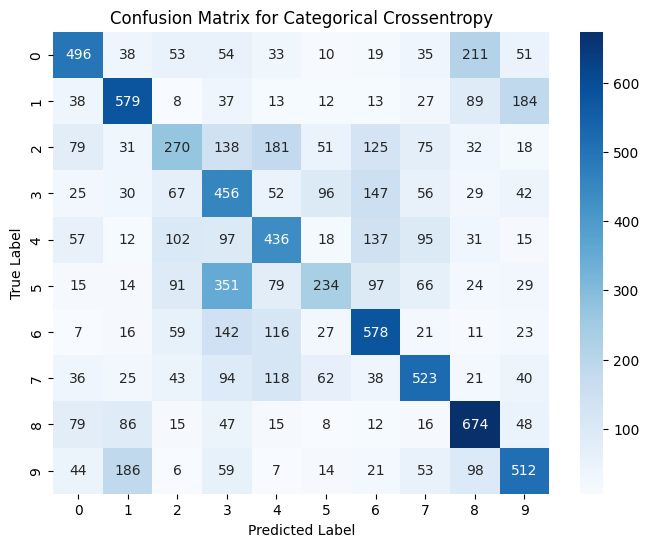

In [51]:
# For Categorical Crossentropy
evaluate_model(categorical_loss, x_test, y_test, 'Categorical Crossentropy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Mean Squared Error:

              precision    recall  f1-score   support

           0       0.52      0.59      0.55      1000
           1       0.62      0.50      0.55      1000
           2       0.42      0.22      0.29      1000
           3       0.36      0.24      0.29      1000
           4       0.37      0.47      0.41      1000
           5       0.36      0.43      0.39      1000
           6       0.53      0.53      0.53      1000
           7       0.47      0.60      0.53      1000
           8       0.66      0.55      0.60      1000
           9       0.48      0.61      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



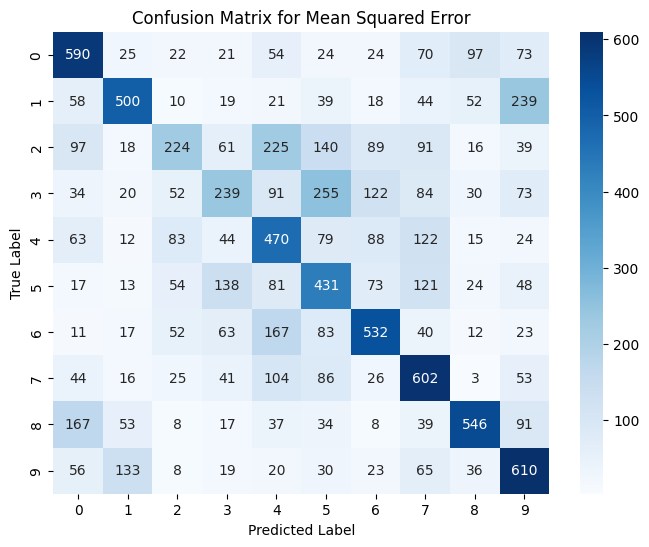

In [52]:
# For MSE
evaluate_model(mse_loss, x_test, y_test, 'Mean Squared Error')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Kullback-Leibler Divergence:

              precision    recall  f1-score   support

           0       0.46      0.64      0.54      1000
           1       0.64      0.55      0.59      1000
           2       0.40      0.24      0.30      1000
           3       0.33      0.16      0.22      1000
           4       0.42      0.39      0.40      1000
           5       0.40      0.39      0.39      1000
           6       0.42      0.63      0.51      1000
           7       0.48      0.57      0.52      1000
           8       0.69      0.49      0.58      1000
           9       0.46      0.61      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



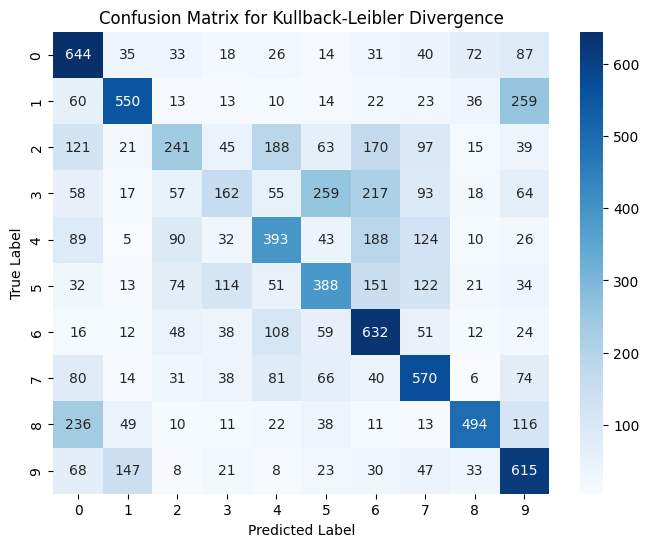

In [53]:
# For KL Divergence
evaluate_model(kld_loss, x_test, y_test, 'Kullback-Leibler Divergence')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Adam Optimizer:

              precision    recall  f1-score   support

           0       0.58      0.46      0.51      1000
           1       0.61      0.55      0.58      1000
           2       0.36      0.32      0.33      1000
           3       0.30      0.45      0.36      1000
           4       0.44      0.39      0.41      1000
           5       0.43      0.28      0.34      1000
           6       0.51      0.53      0.52      1000
           7       0.53      0.54      0.54      1000
           8       0.57      0.68      0.62      1000
           9       0.50      0.58      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



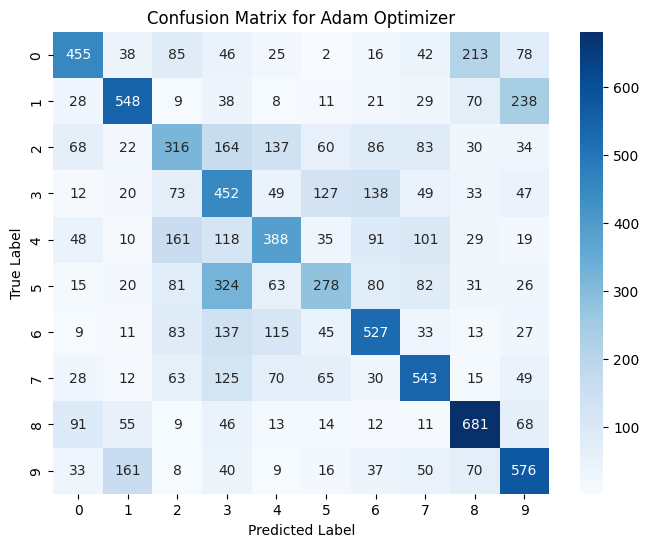

In [54]:
# For Adam Optimizer
evaluate_model(adam_optimizer, x_test, y_test, 'Adam Optimizer')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for SGD Optimizer:

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1000
           1       0.79      0.47      0.59      1000
           2       0.44      0.38      0.41      1000
           3       0.32      0.48      0.38      1000
           4       0.52      0.42      0.47      1000
           5       0.46      0.40      0.43      1000
           6       0.54      0.66      0.60      1000
           7       0.61      0.61      0.61      1000
           8       0.62      0.68      0.65      1000
           9       0.59      0.59      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.55      0.53      0.53     10000
weighted avg       0.55      0.53      0.53     10000



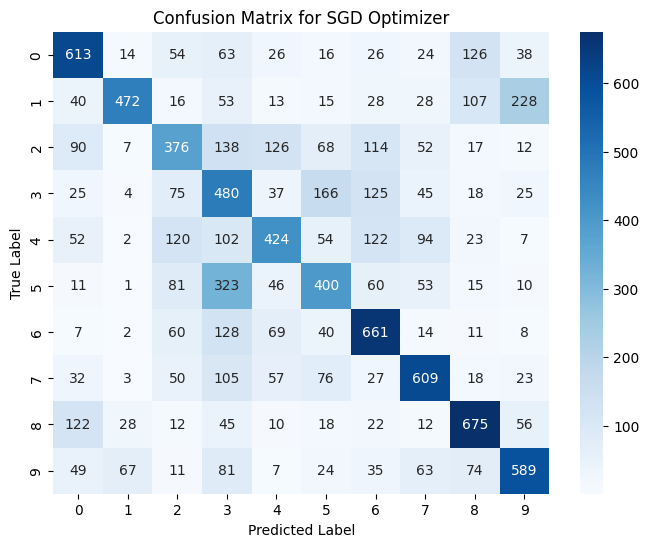

In [55]:
# For SGD Optimizer
evaluate_model(sdg_optimizer, x_test, y_test, 'SGD Optimizer')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for RMSprop Optimizer:

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1000
           1       0.64      0.58      0.61      1000
           2       0.43      0.19      0.27      1000
           3       0.32      0.38      0.35      1000
           4       0.39      0.49      0.44      1000
           5       0.40      0.33      0.36      1000
           6       0.56      0.51      0.54      1000
           7       0.57      0.56      0.57      1000
           8       0.56      0.68      0.62      1000
           9       0.51      0.64      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



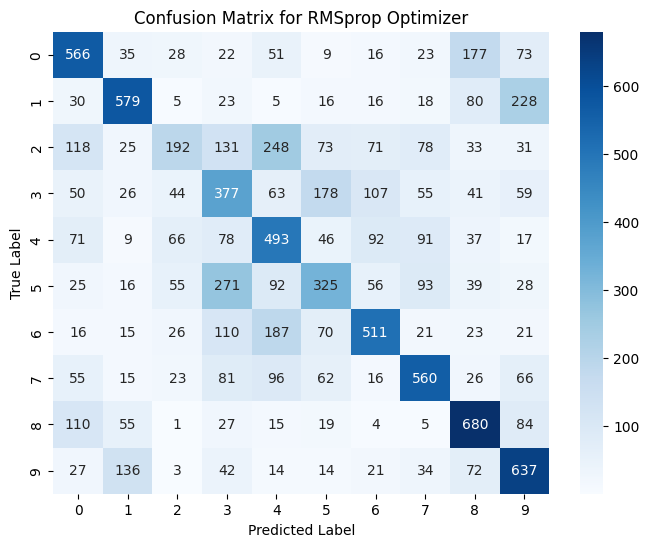

In [56]:
# For RMSprop Optimizer
evaluate_model(rmsprop_optimizer, x_test, y_test, 'RMSprop Optimizer')

##Question:

- How can you further improve model performance if the accuracy is low?
 - Improving a model's performance when accuracy is low can involve various strategies, including enhancing data quality and quantity, optimizing the model architecture and hyperparameters, applying regularization, and leveraging ensemble methods. Systematic evaluation of errors and the use of advanced techniques can also lead to better performance. It’s often beneficial to iterate through these techniques, as improvements can be incremental and context-dependent.

#7. Optimization Strategies:
- Discuss optimization strategies such as:

 - Early stopping to prevent overfitting.
 - Learning rate scheduling for smoother convergence.
 - Weight initialization techniques to ensure efficient learning.



##Question:

- Why is weight initialization important, and how does it impact the
convergence of your network?
 - Weight initialization is crucial because it affects symmetry breaking, gradient flow, and convergence speed in neural networks. Proper initialization techniques, such as Xavier or He initialization, help ensure that training begins from a point that allows the model to learn effectively and converge more rapidly. Poor initialization can lead to issues that hinder the model's ability to learn, making it a fundamental aspect of neural network training.


## 8. Report

### Network Architecture and Justifications

- **Architecture**: The neural network I designed consists of these layers:
  - **Input Layer**: The input shape matches the CIFAR-10 images (32x32x3). This just has flattened data directly given without any changes.
  - **Hidden Layers**:
    - **Layer 1**: I used ReLU activation function for this layer creating a dense layer with 512 neurons using ReLU activation. This choice allows the model to capture complex patterns due to the non-linearity introduced by ReLU, which is computationally efficient and helps avoid issues with vanishing gradients.
    - **Dropout (20%)**: This layer drops 20% of the neurons, which helps reduce overfitting by preventing co-adaptation of neurons.
    - **Layer 2**: A dense layer with 256 neurons using Tanh activation. Tanh is selected for its ability to produce steeper gradients, improving learning in deeper networks, although it may be slower than ReLU.
    - **Dropout (30%)**: This further reduces overfitting by dropping 30% of the neurons.
  - **Output Layer**:
  We needed probabilities for each classes hence I used a dense layer with 10 neurons and a softmax activation function, which is standard for multi-class classification tasks, producing probabilities for each class.

### Training and Test Accuracy

- The model was trained for 50 epochs, I used various loss functions (categorical cross-entropy, mean squared error, and Kullback-Leibler divergence) with different optimizers (Adam, SGD, and RMSprop).
From my Model, the accuracy Increased over time while my loss decreased. It was not steady but finally slowed down. After 50 epochs, I finally got an accuracy of 46% across all models with different loss functions.
  
#### Loss and Accuracy Plots
(Added below)

### Hyperparameter Values

- **Learning Rate**: 0.001 (for Adam optimizer), 0.01 (for SGD and RMSprop)
- **Batch Size**: 32
- **Number of Epochs**: 50
- **Dropout Rates**: 20% after the first hidden layer, 30% after the second hidden layer.

### Challenges Faced and Solutions

- For my loss functions, i ran 3 loss functions and compared their results. However, they provided the same accuracy after 50 epochs.
- As the dataset was large an I had to train the data on 50 epochs. I wasted alot of time correcting my code and rerunning the 50 epochs. So i reduced the epochs to 5, ran my code, fixed my errors and then changed the epochs to 50. I also needed to run 3 loss functions and 3 optimizers which increased the overall runtime of my program.
-Since i needed to run 3 loss functions, I could not use the same model. So i made a copy of it using clone model and worked on the clones.


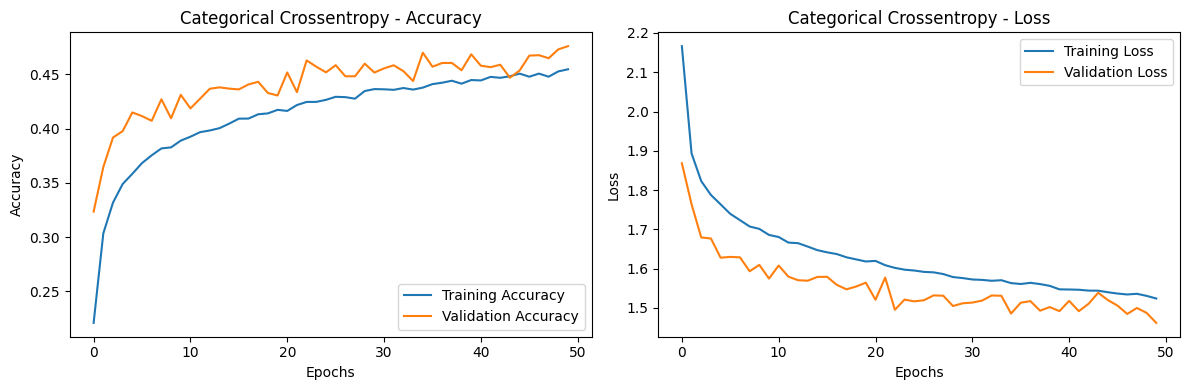

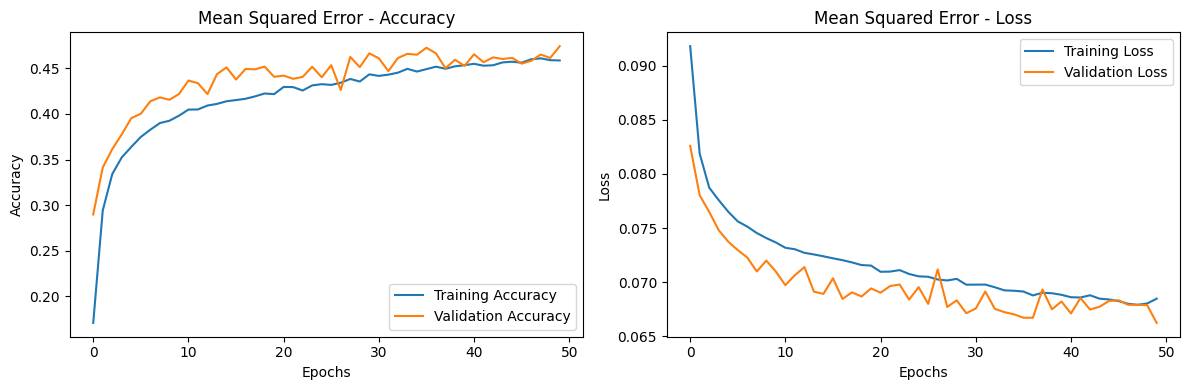

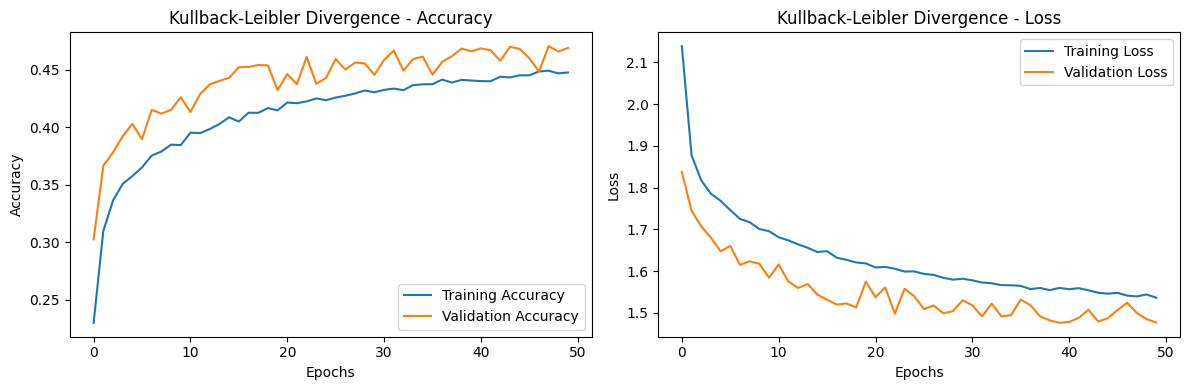

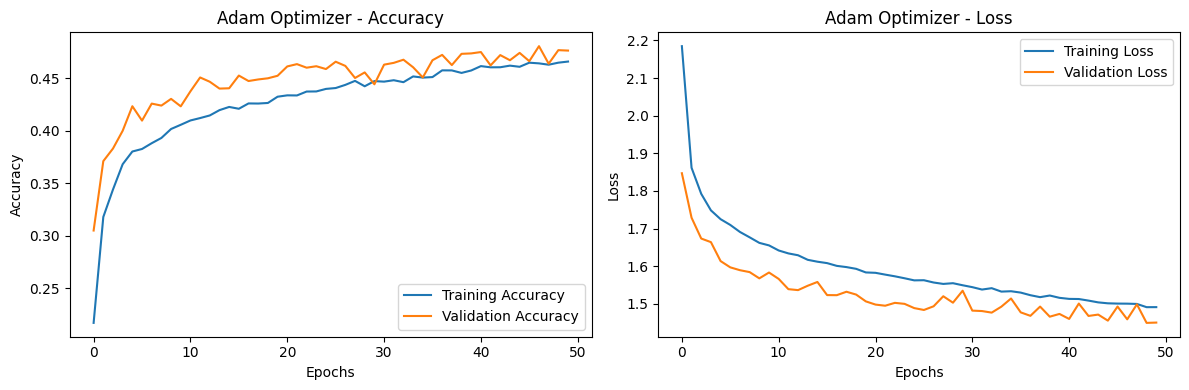

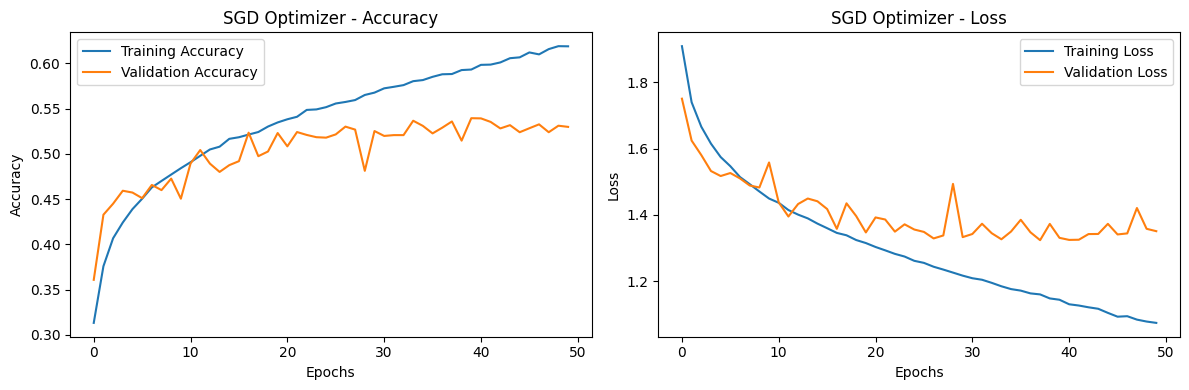

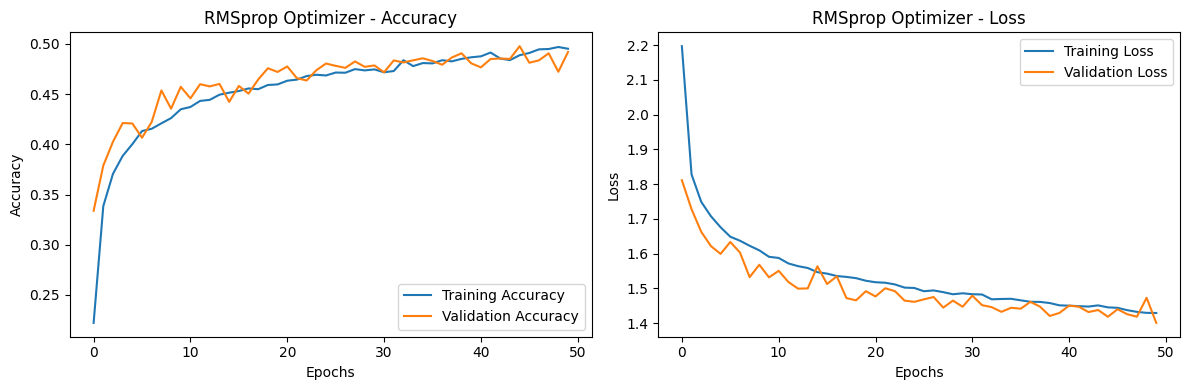

In [57]:
# Plot for each loss function
plot_training(m1, 'Categorical Crossentropy')
plot_training(m2, 'Mean Squared Error')
plot_training(m3, 'Kullback-Leibler Divergence')
plot_training(m4, 'Adam Optimizer')
plot_training(m5, 'SGD Optimizer')
plot_training(m6, 'RMSprop Optimizer')